# Testing a new notebook
Use markdown cells to add nicely formatted content to the notebook.

In [ ]:
import glob
from skimage.io import imread
from skimage.color import gray2rgb
import pandas as pd, numpy as np

import matplotlib.pyplot as plt


from sklearn import datasets, preprocessing, linear_model, metrics
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def convert_to_csv(path_to_dataset):
    image_paths = glob.glob(path_to_dataset + '/*/*/*.JPEG')
    
    train_imgs = []
    test_imgs = []

    for image_path in image_paths:
        image = imread(image_path)
        if image.shape[-1] != 3:
            image = gray2rgb(image)
        if image_path.split('/')[-3] == 'train':
            train_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
        else:
            test_imgs.append(image.ravel().tolist() + [image_path.split('/')[-2]])
    
    img_0 = imread(image_paths[0])
    column_names = [f"p_{x}" for x in range(np.prod(img_0.shape))] + ['label']
    
    train_df = pd.DataFrame(train_imgs, columns=column_names)
    test_df = pd.DataFrame(test_imgs, columns=column_names)

    train_df.to_csv(path_to_dataset+'/train.csv', index=False)
    test_df.to_csv(path_to_dataset+'/test.csv', index=False)

In [ ]:
## Converting to CSV
path_to_dataset = '/content/drive/MyDrive/Group_3'
convert_to_csv(path_to_dataset)

In [ ]:
##Training Data
path_to_dataset = '/content/drive/MyDrive/Group_3'
train_data = pd.read_csv(path_to_dataset + '/train.csv') 
train_data.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,33,13,0,32,14,0,32,14,0,31,...,178,181,186,157,160,165,114,117,122,gasmask
1,155,174,144,137,150,122,179,178,157,197,...,108,113,119,104,111,119,93,102,111,gasmask
2,128,149,168,86,107,126,59,80,99,107,...,7,5,10,19,16,23,17,14,21,gasmask
3,255,253,218,254,249,217,254,250,221,255,...,160,141,85,128,120,57,133,132,65,gasmask
4,101,89,15,101,89,15,102,90,16,102,...,211,176,108,209,175,111,212,182,112,gasmask


In [ ]:
#Testing Data
test_data = pd.read_csv(path_to_dataset + '/test.csv') 
test_data.head()

,p_0,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_12279,p_12280,p_12281,p_12282,p_12283,p_12284,p_12285,p_12286,p_12287,label
0,35,8,13,31,4,9,29,2,7,33,...,89,21,32,87,19,30,109,42,51,gasmask
1,252,253,255,252,253,255,252,253,255,252,...,249,255,255,247,255,253,244,253,250,gasmask
2,24,24,24,25,25,25,27,27,27,29,...,41,41,41,52,52,52,52,52,52,gasmask
3,27,32,26,31,36,30,35,40,33,39,...,19,20,2,19,22,1,22,25,4,gasmask
4,73,60,78,134,121,139,111,98,116,147,...,120,137,163,112,129,155,120,137,163,gasmask


In [ ]:
### Encoding the label column for train and test data

# creating label encoder
le = preprocessing.LabelEncoder()
le.fit(train_data['label'])
labels = le.classes_
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Mapping:', le_label_mapping)
print()

print('Previous Labels:')
print(train_data['label'])
print()

train_data['label'] = le.transform(train_data['label'])

print('New labels:')
print(train_data['label'])
print()

print('Previous Test Labels:')
print(test_data['label'])

test_data['label'] = le.transform(test_data['label'])

print('New Test labels:')
print(test_data['label'])


Mapping: {'flagpole': 0, 'gasmask': 1, 'gondola': 2, 'hourglass': 3, 'lampshade': 4}

Previous Labels:
0         gasmask
1         gasmask
2         gasmask
3         gasmask
4         gasmask
          ...    
2145    lampshade
2146    lampshade
2147    lampshade
2148    lampshade
2149    lampshade
Name: label, Length: 2150, dtype: object

New labels:
0       1
1       1
2       1
3       1
4       1
       ..
2145    4
2146    4
2147    4
2148    4
2149    4
Name: label, Length: 2150, dtype: int64

Previous Test Labels:
0       gasmask
1       gasmask
2       gasmask
3       gasmask
4       gasmask
         ...   
245    flagpole
246    flagpole
247    flagpole
248    flagpole
249    flagpole
Name: label, Length: 250, dtype: object
New Test labels:
0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: label, Length: 250, dtype: int64


In [ ]:
## Getting X, y, X_test and y_test from Dataframes

X = train_data.loc[:, 'p_0':'p_12287']
y = train_data.loc[:, 'label']
X_test = test_data.loc[:, 'p_0':'p_12287']
y_test = test_data.loc[:, 'label']

In [ ]:
###### Scaling the data and replacing itself 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
print(X)

X_test =  scaler.transform(X_test)
print(X_test)

[[-0.974644   -1.2275119  -1.30320568 ...  0.21426598  0.26775781
   0.35476307]
 [ 0.50108345  0.72029     0.33190801 ... -0.06177434  0.07024662
   0.2172535 ]
 [ 0.17448803  0.41783628  0.60442696 ... -1.0607774  -1.08848572
  -0.90782483]
 ...
 [-1.37381617 -1.38478783 -1.30320568 ... -1.28423861 -1.27282951
  -1.17034311]
 [-0.88997111 -1.17911931 -1.30320568 ... -1.2316595  -1.1674902
  -1.03283354]
 [-0.90206724 -0.23546373  0.64984678 ... -0.56127587 -0.77246781
  -0.13277087]]
[[-0.95045174 -1.28800264 -1.15559125 ...  0.1485421  -0.71979816
  -0.53279872]
 [ 1.67440773  1.67604372  1.59230814 ...  1.923087    2.05852598
   1.95487448]
 [-1.08350913 -1.09443227 -1.03068673 ... -0.6007102  -0.58812403
  -0.52029785]
 ...
 [-0.63595245 -0.06608965  0.68391165 ... -0.04862956  0.71544985
   1.60485011]
 [ 0.67042922  0.70819185  0.69526661 ...  0.42458241  0.24142299
  -0.14527174]
 [-1.01093237 -1.00974523 -1.30320568 ... -0.15378778 -0.14043199
  -0.09526826]]


In [ ]:
### Train Validation splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2,  random_state = 100)


In [ ]:
# Regularization to solve Overfitting problem
alpha_test = {0, 0.01, 0.1, 10, 100, 1000, 10000}
mse_valid_all ={}
for alpha in alpha_test:
  model = linear_model.Ridge(alpha = alpha)
  model = model.fit(X_train, y_train)
  y_pred_valid = model.predict(X_valid)
  mse_valid = np.mean((y_pred_valid - y_valid)**2)
  mse_valid_all[alpha]= mse_valid

mse_valid_all

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


{0: 3.331135409576214,
 0.1: 3.3287162505471675,
 100: 2.3103285120484403,
 1000: 1.441533117111901,
 10: 3.1224416319710855,
 0.01: 3.330893127165699,
 10000: 1.210321302073531}

In [ ]:
### Training the model and setting the hyperparameters

model = linear_model.LogisticRegression(C=0.00001, fit_intercept=True, solver='lbfgs', max_iter=500)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
def test_and_report(model, X_test, y_test):
    ### Testing the model
    y_test
    y_test_actual = y_test

    y_test_predicted = model.predict(X_test)

    ############## Performance metrics ################
    from sklearn import metrics

    print("Performance for Test data:")
    print("Confustion Matrix:")
    print(metrics.confusion_matrix(y_test_actual, y_test_predicted))

    print("Classification metrics:")
    print(metrics.classification_report(y_test_actual, y_test_predicted, digits = 3, target_names = le.classes_))



In [ ]:
test_and_report(model,X_test,y_test)

Performance for Test data:
Confustion Matrix:
[[41  0  8  1  0]
 [ 4  0 24 10 12]
 [ 5  0 36  6  3]
 [ 9  1  2 17 21]
 [ 5  0  5  5 35]]
Classification metrics:
              precision    recall  f1-score   support

    flagpole      0.641     0.820     0.719        50
     gasmask      0.000     0.000     0.000        50
     gondola      0.480     0.720     0.576        50
   hourglass      0.436     0.340     0.382        50
   lampshade      0.493     0.700     0.579        50

    accuracy                          0.516       250
   macro avg      0.410     0.516     0.451       250
weighted avg      0.410     0.516     0.451       250



In [ ]:
y_pred = model.predict(X_train)
conf_matrix = metrics.confusion_matrix(y_train, y_pred)
conf_matrix

True Positives: 8
True Negatives: 302
False Positives: 0
False Negatives: 31
--------------------------------------------------
Accuracy: 0.91
Sensitivity: 0.21
Specificity: 1.0
PPV: 100.0
NPV: 90.69
TP: 8
f_1 Score: 0.34


In [ ]:
conf_matrix = metrics.confusion_matrix(y_test, y_predict)
conf_matrix

True Positives: 0
True Negatives: 41
False Positives: 0
False Negatives: 4
--------------------------------------------------
Accuracy: 0.91
Sensitivity: 0.0
Specificity: 1.0
PPV: nan
NPV: 91.11
TP: 0
f_1 Score: 0.0


<ipython-input-12-3e79adf26dd4>:16: RuntimeWarning: invalid value encountered in long_scalars
  PPV = (TP/(TP+FP))*100


# Neural Network Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
# Convert the target (y_train and y_test) to one-hot encoding
number_of_classes = 5
y_train = to_categorical(y_train, num_classes = number_of_classes) 
y_test = to_categorical(y_test, num_classes = number_of_classes) 
y_valid = to_categorical(y_valid, num_classes = number_of_classes) 
print("shape of y_train =", y_train.shape)
print("shape of y_test = ", y_test.shape)
print("shape of y_valid = ", y_valid.shape)

shape of y_train = (1720, 5)
shape of y_test =  (250, 5)
shape of y_valid =  (430, 5)


In [ ]:

# from keras import regularizers
# from keras.layers.core import Dropout

In [ ]:
## Returns a simple nn model
def nn_model():
    model = Sequential()
    model.add(Input(shape = 12288))
    model.add(Dense(1000, activation = 'sigmoid'))
    model.add(Dense(500, activation = 'sigmoid'))
    model.add(Dense(number_of_classes, activation = 'softmax'))

    model.compile(optimizer = 'sgd',
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])
    
    return model

In [ ]:
def test_and_report(model, X_test, y_test):
    ### Testing the model
    y_test
    y_test_actual = np.argmax(y_test, axis = 1)

    y_test_pred = model.predict(X_test)
    y_test_predicted = np.argmax(y_test_pred, axis = 1)

    ############## Performance metrics ################
    from sklearn import metrics

    print("Performance for Test data:")
    print("Confustion Matrix:")
    print(metrics.confusion_matrix(y_test_actual, y_test_predicted))

    print("Classification metrics:")
    print(metrics.classification_report(y_test_actual, y_test_predicted, digits = 3, target_names = le.classes_))



In [ ]:
model = nn_model()

In [ ]:
# Trainning the model
model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/50
54/54 [==============================] - 3s 11ms/step - loss: 1.4610 - accuracy: 0.4145 - val_loss: 1.3347 - val_accuracy: 0.5116
Epoch 2/50
54/54 [==============================] - 0s 5ms/step - loss: 1.3085 - accuracy: 0.4930 - val_loss: 1.2615 - val_accuracy: 0.5093
Epoch 3/50
54/54 [==============================] - 0s 6ms/step - loss: 1.2376 - accuracy: 0.5233 - val_loss: 1.1964 - val_accuracy: 0.5209
Epoch 4/50
54/54 [==============================] - 0s 5ms/step - loss: 1.1920 - accuracy: 0.5297 - val_loss: 1.1864 - val_accuracy: 0.5465
Epoch 5/50
54/54 [==============================] - 0s 5ms/step - loss: 1.1574 - accuracy: 0.5506 - val_loss: 1.1462 - val_accuracy: 0.5465
Epoch 6/50
54/54 [==============================] - 0s 5ms/step - loss: 1.1337 - accuracy: 0.5657 - val_loss: 1.1479 - val_accuracy: 0.5465
Epoch 7/50
54/54 [==============================] - 0s 5ms/step - loss: 1.1126 - accuracy: 0.5744 - val_loss: 1.1271 - val_accuracy: 0.5395
Epoch 8/50
54/54 [=

In [ ]:
test_and_report(model, X_test, y_test)

8/8 [==============================] - 0s 2ms/step
Performance for Test data:
Confustion Matrix:
[[45  0  2  3  0]
 [ 0 12 12 17  9]
 [ 9  5 29  3  4]
 [ 7  6  3 17 17]
 [ 4  1  3  3 39]]
Classification metrics:
              precision    recall  f1-score   support

    flagpole      0.692     0.900     0.783        50
     gasmask      0.500     0.240     0.324        50
     gondola      0.592     0.580     0.586        50
   hourglass      0.395     0.340     0.366        50
   lampshade      0.565     0.780     0.655        50

    accuracy                          0.568       250
   macro avg      0.549     0.568     0.543       250
weighted avg      0.549     0.568     0.543       250



Training Accuracy: 84.19%

Validation Accuracy: 58.37%

Testing Accuracy: 56.8%

## Applying SMOTE on train data to oversample it

In [ ]:
# Convert the target (y_train and y_test) to one-hot encoding
number_of_classes = 5
y = to_categorical(y, num_classes = number_of_classes) 

print("shape of y_train =", y.shape)
print("shape of y_test = ", y_test.shape)


shape of y_train = (2150, 5)
shape of y_test =  (250, 5)


In [ ]:
from imblearn.over_sampling import SMOTE

def perform_smote(x_data, y_data):
    y_data_res = np.argmax(y_data, axis = 1)

    print("Number of samples per classes Before applying SMOTE")
    bin_c = np.bincount(y_data_res)
    ii = np.nonzero(bin_c)[0]
    print(np.vstack((ii, bin_c[ii])).T)
    # print(y_data_res.value_counts())

    smt = SMOTE(random_state = 2)
    x_data_res, y_data_res = smt.fit_resample(x_data, y_data_res.ravel())

    print("Number of samples per classes After applying SMOTE")
    bin_c = np.bincount(y_data_res)
    ii = np.nonzero(bin_c)[0]
    print(np.vstack((ii, bin_c[ii])).T)

    number_of_classes = 5
    y_data_res = to_categorical(y_data_res, num_classes=number_of_classes) 

    return x_data_res, y_data_res

In [ ]:
X_res, y_res = perform_smote(X, y)

print("Size of train samples after smote")
print(X_res.shape)
print(y_res.shape)

Number of samples per classes Before applying SMOTE
[[  0 500]
 [  1 250]
 [  2 500]
 [  3 400]
 [  4 500]]
Number of samples per classes After applying SMOTE
[[  0 500]
 [  1 500]
 [  2 500]
 [  3 500]
 [  4 500]]
Size of train samples after smote
(2500, 12288)
(2500, 5)


In [ ]:
### Train Validation splitting the data
X_train_res, X_valid_res, y_train_res, y_valid_res = train_test_split(X_res, y_res, test_size = 0.2,  random_state = 100)

In [ ]:
## Training the model with new data
model = nn_model()
model.fit(X_train_res, y_train_res, epochs=50, verbose=1, validation_data=(X_valid_res, y_valid_res))

Epoch 1/50
63/63 [==============================] - 1s 7ms/step - loss: 1.5080 - accuracy: 0.3430 - val_loss: 1.3876 - val_accuracy: 0.4540
Epoch 2/50
63/63 [==============================] - 0s 5ms/step - loss: 1.3461 - accuracy: 0.4740 - val_loss: 1.3374 - val_accuracy: 0.4180
Epoch 3/50
63/63 [==============================] - 0s 6ms/step - loss: 1.2679 - accuracy: 0.5080 - val_loss: 1.2710 - val_accuracy: 0.4460
Epoch 4/50
63/63 [==============================] - 0s 5ms/step - loss: 1.2139 - accuracy: 0.5170 - val_loss: 1.2050 - val_accuracy: 0.5440
Epoch 5/50
63/63 [==============================] - 0s 5ms/step - loss: 1.1776 - accuracy: 0.5395 - val_loss: 1.1864 - val_accuracy: 0.5460
Epoch 6/50
63/63 [==============================] - 0s 5ms/step - loss: 1.1512 - accuracy: 0.5500 - val_loss: 1.2193 - val_accuracy: 0.4680
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 1.1268 - accuracy: 0.5605 - val_loss: 1.1774 - val_accuracy: 0.5280
Epoch 8/50
63/63 [==

In [ ]:
test_and_report(model, X_test, y_test)

8/8 [==============================] - 0s 2ms/step
Performance for Test data:
Confustion Matrix:
[[42  1  3  4  0]
 [ 2 23  6 17  2]
 [11 11 19  4  5]
 [ 5 15  2 19  9]
 [ 0  4  1 18 27]]
Classification metrics:
              precision    recall  f1-score   support

    flagpole      0.700     0.840     0.764        50
     gasmask      0.426     0.460     0.442        50
     gondola      0.613     0.380     0.469        50
   hourglass      0.306     0.380     0.339        50
   lampshade      0.628     0.540     0.581        50

    accuracy                          0.520       250
   macro avg      0.535     0.520     0.519       250
weighted avg      0.535     0.520     0.519       250



After SMOTE:

Training Accuracy: 89.29%

Validation Accuracy: 61.80%

Testing Accuracy: 52.0%

## Hypertuning the model parameters

In [ ]:
### Splitting X into X_train and X_valid for training the model and validating it

# X_train, X_valid, y_train, y_valid = train_test_split(X_train_res, y_train_res, test_size = 0.2,  random_state = 100, stratify = y_train_res)

print('Train X:', X_train_res.shape)
print('Validation X:', X_valid_res.shape)
print('Train y:', y_train_res.shape)
print('Validation y:', y_valid_res.shape)

Train X: (2000, 12288)
Validation X: (500, 12288)
Train y: (2000, 5)
Validation y: (500, 5)


In [ ]:
def model_builder(hp):
    model = Sequential()
    model.add( Input(shape = (12288,)) )
    number_of_layers = hp.Int("num_layers", 2, 5)
    for i in range(number_of_layers):
      units = hp.Int(f"units_{i}", min_value = 16, max_value = 128, step = 16)
      activation = hp.Choice("activation", ["relu", "sigmoid"])  
      model.add( Dense(units, activation = activation) ) #hidden layer
    
    model.add( Dense(5, activation='softmax') ) #output layer, activation must be softmax
   
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics = ["accuracy"],
    )
    return model

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 26.7 MB/s 
     |████████████████████████████████| 1.6 MB 60.7 MB/s 


In [ ]:
import keras_tuner
tuner = keras_tuner.BayesianOptimization(
    hypermodel = model_builder,
    objective="val_accuracy",
    max_trials = 150, 
    executions_per_trial = 1,
    overwrite = True,
    directory="project_logs",
    project_name="labproject",
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}


In [ ]:
tuner.search(X_train_res, y_train_res, epochs = 100, validation_data = (X_valid_res, y_valid_res))

In [ ]:
tuner.results_summary()

Results summary
Results in project_logs/labproject
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 5
units_0: 80
activation: relu
units_1: 16
units_2: 16
units_3: 128
units_4: 16
Score: 0.6759999990463257
Trial summary
Hyperparameters:
num_layers: 4
units_0: 128
activation: relu
units_1: 128
units_2: 112
units_3: 64
units_4: 16
Score: 0.6759999990463257
Trial summary
Hyperparameters:
num_layers: 5
units_0: 128
activation: relu
units_1: 80
units_2: 48
units_3: 96
units_4: 16
Score: 0.6740000247955322
Trial summary
Hyperparameters:
num_layers: 3
units_0: 128
activation: relu
units_1: 128
units_2: 16
units_3: 16
units_4: 16
Score: 0.671999990940094
Trial summary
Hyperparameters:
num_layers: 5
units_0: 80
activation: relu
units_1: 64
units_2: 112
units_3: 96
units_4: 16
Score: 0.6700000166893005
Trial summary
Hyperparameters:
num_layers: 5
units_0: 96
activation: relu
units_1: 64
units_2: 80
units_3: 80
units_4: 16
Score: 0.6679999828338623
Trial summary
Hyperparameters:


### Training the model again with these values of hyperparameters

In [ ]:
def best_model():
    model = Sequential()
    model.add(Input(shape = 12288))
    model.add(Dense(80, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(16, activation = 'relu'))
    model.add(Dense(number_of_classes, activation = 'softmax'))

    model.compile(optimizer = 'sgd',
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])
    
    return model

In [ ]:
model = best_model()

In [ ]:
### Finding the best epoch
history = model.fit(X_train_res, y_train_res, epochs=100, validation_data = (X_valid_res, y_valid_res))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
63/63 [==============================] - 1s 7ms/step - loss: 1.5567 - accuracy: 0.2610 - val_loss: 1.5035 - val_accuracy: 0.3220
Epoch 2/100
63/63 [==============================] - 0s 4ms/step - loss: 1.3641 - accuracy: 0.4490 - val_loss: 1.3573 - val_accuracy: 0.4380
Epoch 3/100
63/63 [==============================] - 0s 5ms/step - loss: 1.1862 - accuracy: 0.5245 - val_loss: 1.2692 - val_accuracy: 0.4780
Epoch 4/100
63/63 [==============================] - 0s 5ms/step - loss: 1.0661 - accuracy: 0.5895 - val_loss: 1.2412 - val_accuracy: 0.5140
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.9638 - accuracy: 0.6515 - val_loss: 1.2968 - val_accuracy: 0.5280
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.8797 - accuracy: 0.6965 - val_loss: 1.2081 - val_accuracy: 0.5520
Epoch 7/100
63/63 [==============================] - 0s 5ms/step - loss: 0.8086 - accuracy: 0.7275 - val_loss: 1.2301 - val_accuracy: 0.5820
Epoch 8/100
6

In [ ]:
hypermodel = best_model()

# Retraining the model
hypermodel.fit(X_train_res, y_train_res, epochs=best_epoch, validation_data = (X_valid_res, y_valid_res))

Epoch 1/99
63/63 [==============================] - 1s 7ms/step - loss: 1.5605 - accuracy: 0.2930 - val_loss: 1.4881 - val_accuracy: 0.3440
Epoch 2/99
63/63 [==============================] - 0s 5ms/step - loss: 1.4020 - accuracy: 0.3985 - val_loss: 1.3835 - val_accuracy: 0.3920
Epoch 3/99
63/63 [==============================] - 0s 5ms/step - loss: 1.2554 - accuracy: 0.5125 - val_loss: 1.2568 - val_accuracy: 0.4900
Epoch 4/99
63/63 [==============================] - 0s 4ms/step - loss: 1.0799 - accuracy: 0.5765 - val_loss: 1.2118 - val_accuracy: 0.5220
Epoch 5/99
63/63 [==============================] - 0s 5ms/step - loss: 0.9575 - accuracy: 0.6455 - val_loss: 1.2090 - val_accuracy: 0.5620
Epoch 6/99
63/63 [==============================] - 0s 4ms/step - loss: 0.8319 - accuracy: 0.7080 - val_loss: 1.2067 - val_accuracy: 0.5780
Epoch 7/99
63/63 [==============================] - 0s 4ms/step - loss: 0.7332 - accuracy: 0.7580 - val_loss: 1.2543 - val_accuracy: 0.5760
Epoch 8/99
63/63 [==

In [ ]:
test_and_report(hypermodel, X_test, y_test)

8/8 [==============================] - 0s 2ms/step
Performance for Test data:
Confustion Matrix:
[[39  1  5  2  3]
 [ 1 22  5  9 13]
 [10  6 26  5  3]
 [ 3  8  2 24 13]
 [ 0  4  3  6 37]]
Classification metrics:
              precision    recall  f1-score   support

    flagpole      0.736     0.780     0.757        50
     gasmask      0.537     0.440     0.484        50
     gondola      0.634     0.520     0.571        50
   hourglass      0.522     0.480     0.500        50
   lampshade      0.536     0.740     0.622        50

    accuracy                          0.592       250
   macro avg      0.593     0.592     0.587       250
weighted avg      0.593     0.592     0.587       250



## Milestone - 03
CNN Model

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, add, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical, plot_model
from skimage import io
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
X_train_new = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val_new = X_valid.reshape(X_valid.shape[0], 64, 64, 3)
X_test_new = X_test.reshape(X_test.shape[0], 64, 64, 3)

In [ ]:

X_train_new.shape

(1720, 64, 64, 3)

In [ ]:

inputs = Input(shape=(64, 64, 3), name="img")
x = Conv2D(64, 3, strides = (2, 2), activation="relu")(inputs)
block_1_output = MaxPooling2D(pool_size = (3,3), strides= (2, 2), padding = "same")(x)

x = Conv2D(64, 3,strides = (1,1), activation="relu", padding="same")(block_1_output)
x = Conv2D(64, 3, strides = (1,1), activation="relu", padding="same")(x)
block_2_output = add([x, block_1_output])

x = Conv2D(64, 3, strides = (1,1), activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)  
block_3_output = add([x, block_2_output])

x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(block_3_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)
block_4_output = add([x, block_3_output])

x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(block_4_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)
block_5_output = add([x, block_4_output])

x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(block_5_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)
block_6_output = add([x, block_5_output])

x = GlobalAveragePooling2D()(block_6_output)
# x = Dense(256, activation="relu")(x)
# x = Dropout(0.5)(x)
outputs = Dense(5, activation="softmax")(x)

model = Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 31, 31, 64)   1792        ['img[0][0]']                    
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 64)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 16, 16, 64)   36928       ['max_pooling2d[0][0]']          
                                                                                              

In [ ]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

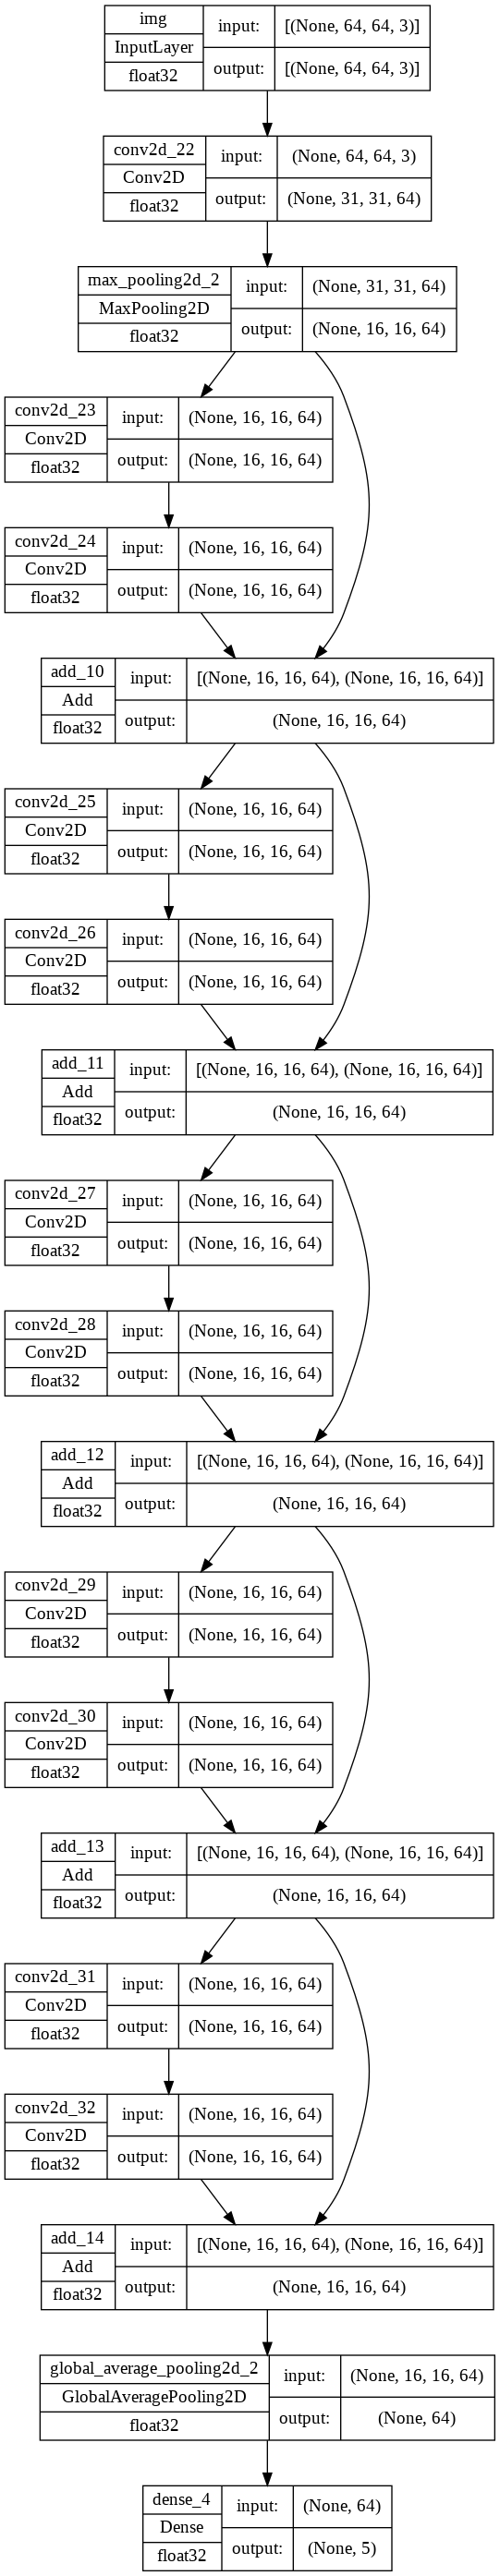

In [ ]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [ ]:
hist = model.fit(X_train_new,y_train, epochs=40, validation_data=(X_val_new,y_valid), verbose=1)

Epoch 1/40
54/54 [==============================] - 29s 542ms/step - loss: 1.2795 - accuracy: 0.4977 - val_loss: 1.1658 - val_accuracy: 0.5674
Epoch 2/40
54/54 [==============================] - 31s 573ms/step - loss: 1.1836 - accuracy: 0.5378 - val_loss: 1.0743 - val_accuracy: 0.5814
Epoch 3/40
54/54 [==============================] - 30s 559ms/step - loss: 1.1628 - accuracy: 0.5436 - val_loss: 1.0475 - val_accuracy: 0.5674
Epoch 4/40
54/54 [==============================] - 29s 543ms/step - loss: 1.1312 - accuracy: 0.5448 - val_loss: 1.0137 - val_accuracy: 0.5698
Epoch 5/40
54/54 [==============================] - 30s 552ms/step - loss: 1.1277 - accuracy: 0.5488 - val_loss: 1.0134 - val_accuracy: 0.5907
Epoch 6/40
54/54 [==============================] - 29s 534ms/step - loss: 1.1111 - accuracy: 0.5727 - val_loss: 1.0702 - val_accuracy: 0.6093
Epoch 7/40
54/54 [==============================] - 29s 538ms/step - loss: 1.0876 - accuracy: 0.5727 - val_loss: 0.9950 - val_accuracy: 0.5977

In [ ]:
loss_test, pred_test = model.evaluate(X_test_new, y_test)
print("Testing accuracy (%) =", pred_test*100)

8/8 [==============================] - 1s 115ms/step - loss: 1.0179 - accuracy: 0.5960
Testing accuracy (%) = 59.60000157356262


## CNN Model(Smote data)

In [ ]:
X_train_res_new = X_train_res.reshape(X_train_res.shape[0], 64, 64, 3)
X_val_res_new = X_valid_res.reshape(X_valid_res.shape[0], 64, 64, 3)

In [ ]:
inputs = Input(shape=(64, 64, 3), name="img")
x = Conv2D(64, 3, strides = (2, 2), activation="relu")(inputs)
block_1_output = MaxPooling2D(pool_size = (3,3), strides= (2, 2), padding = "same")(x)

x = Conv2D(64, 3,strides = (1,1), activation="relu", padding="same")(block_1_output)
x = Conv2D(64, 3, strides = (1,1), activation="relu", padding="same")(x)
block_2_output = add([x, block_1_output])

x = Conv2D(64, 3, strides = (1,1), activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)  
block_3_output = add([x, block_2_output])

x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(block_3_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)
block_4_output = add([x, block_3_output])

x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(block_4_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)
block_5_output = add([x, block_4_output])

x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(block_5_output)
x = Conv2D(64, 3, strides = (1,1),activation="relu", padding="same")(x)
block_6_output = add([x, block_5_output])

x = GlobalAveragePooling2D()(block_6_output)
# x = Dense(256, activation="relu")(x)
# x = Dropout(0.5)(x)
outputs = Dense(5, activation="softmax")(x)

model = Model(inputs, outputs)
model.summary()


model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_22 (Conv2D)             (None, 31, 31, 64)   1792        ['img[0][0]']                    
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 16, 16, 64)  0           ['conv2d_22[0][0]']              
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 64)   36928       ['max_pooling2d_2[0][0]']        
                                                                                            

In [ ]:
hist = model.fit(X_train_res_new,y_train_res, epochs=40, validation_data=(X_val_res_new,y_valid_res), verbose=1)

Epoch 1/40
63/63 [==============================] - 34s 530ms/step - loss: 1.5078 - accuracy: 0.3455 - val_loss: 1.4248 - val_accuracy: 0.3280
Epoch 2/40
63/63 [==============================] - 33s 530ms/step - loss: 1.3279 - accuracy: 0.4425 - val_loss: 1.2879 - val_accuracy: 0.4720
Epoch 3/40
63/63 [==============================] - 34s 534ms/step - loss: 1.2456 - accuracy: 0.4835 - val_loss: 1.1733 - val_accuracy: 0.4980
Epoch 4/40
63/63 [==============================] - 33s 530ms/step - loss: 1.2134 - accuracy: 0.4930 - val_loss: 1.1544 - val_accuracy: 0.5340
Epoch 5/40
63/63 [==============================] - 36s 569ms/step - loss: 1.1808 - accuracy: 0.5060 - val_loss: 1.1606 - val_accuracy: 0.5060
Epoch 6/40
63/63 [==============================] - 34s 535ms/step - loss: 1.1708 - accuracy: 0.5045 - val_loss: 1.1891 - val_accuracy: 0.5160
Epoch 7/40
63/63 [==============================] - 33s 527ms/step - loss: 1.1488 - accuracy: 0.5315 - val_loss: 1.1557 - val_accuracy: 0.5500

In [ ]:
loss_test, pred_test = model.evaluate(X_test_new, y_test)
print("Testing accuracy (%) =", pred_test*100)

8/8 [==============================] - 1s 114ms/step - loss: 0.8239 - accuracy: 0.6560
Testing accuracy (%) = 65.6000018119812
